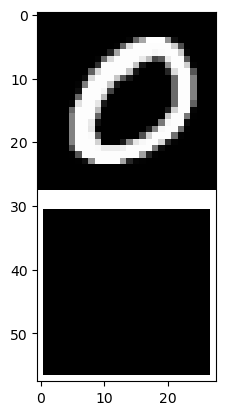

Enter label for this image (choose from ['fraction']): fraction


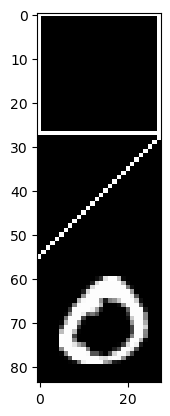

Enter label for this image (choose from ['fraction']): fraction


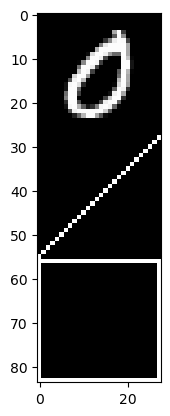

Enter label for this image (choose from ['fraction']): fraction


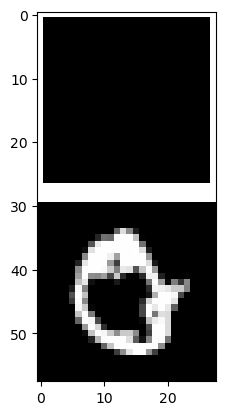

Enter label for this image (choose from ['fraction']): fraction


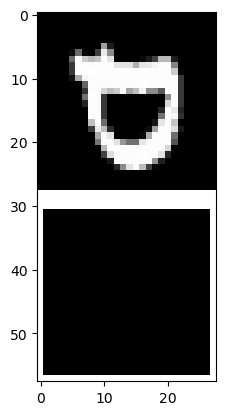

Enter label for this image (choose from ['fraction']): fraction


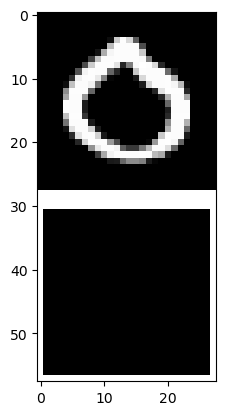

Enter label for this image (choose from ['fraction']): fraction


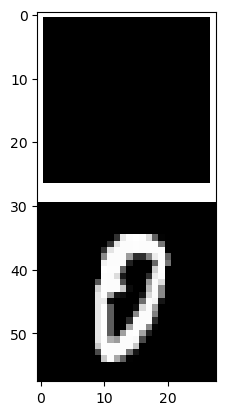

Enter label for this image (choose from ['fraction']): fraction


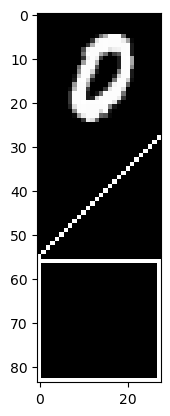

Enter label for this image (choose from ['fraction']): fraction


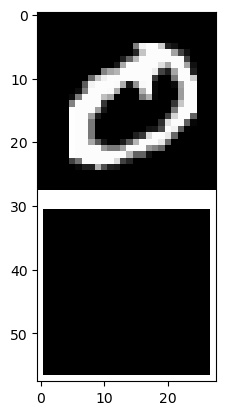

Enter label for this image (choose from ['fraction']): fraction


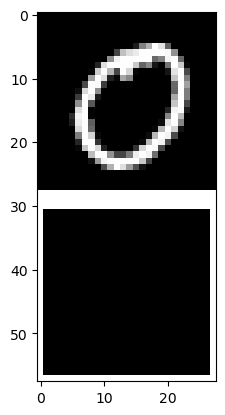

Enter label for this image (choose from ['fraction']): fraction


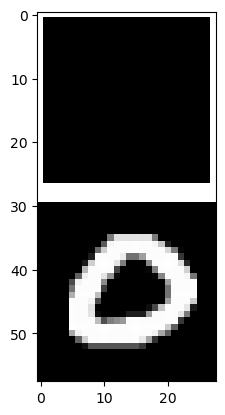

Enter label for this image (choose from ['fraction']): fraction


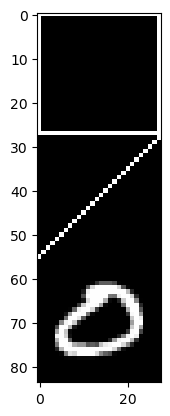

Enter label for this image (choose from ['fraction']): fraction


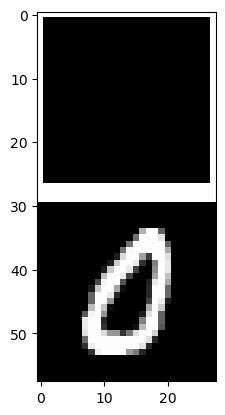

Enter label for this image (choose from ['fraction']): fraction


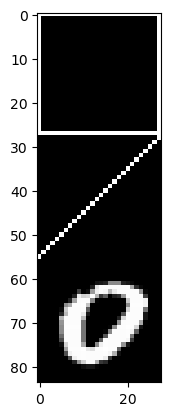

Enter label for this image (choose from ['fraction']): fraction


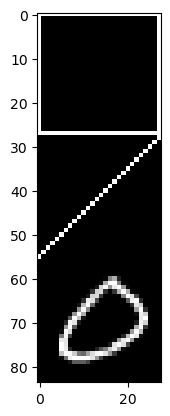

Enter label for this image (choose from ['fraction']): fraction


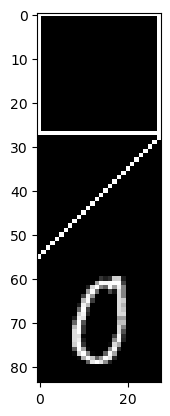

Enter label for this image (choose from ['fraction']): fraction


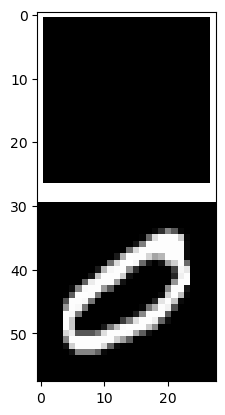

Enter label for this image (choose from ['fraction']): fraction


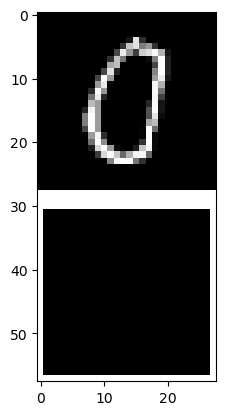

Enter label for this image (choose from ['fraction']): fraction


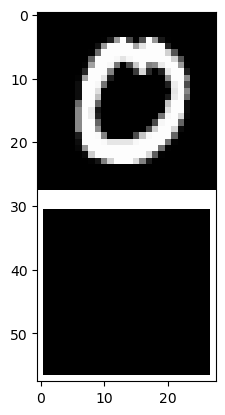

Enter label for this image (choose from ['fraction']): fraction


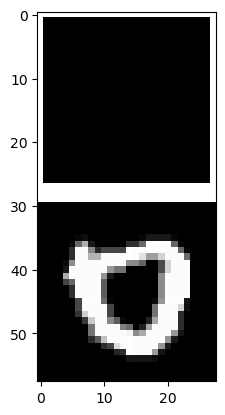

Enter label for this image (choose from ['fraction']): fraction


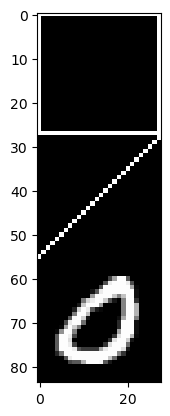

Enter label for this image (choose from ['fraction']): fraction


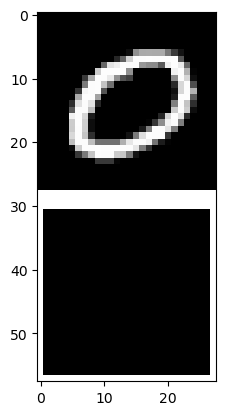

Enter label for this image (choose from ['fraction']): fraction


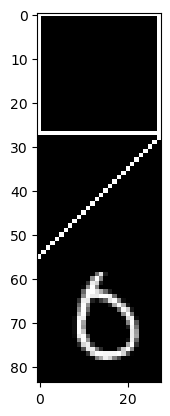

Enter label for this image (choose from ['fraction']): fraction


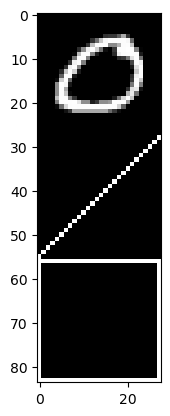

Enter label for this image (choose from ['fraction']): 


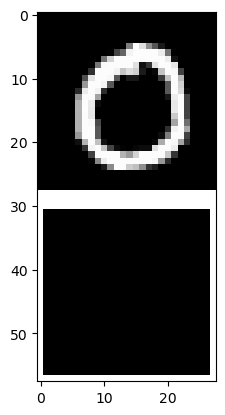

Enter label for this image (choose from ['fraction']): fraction


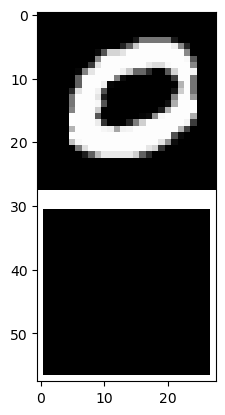

In [ ]:
import os
import cv2
from matplotlib import pyplot as plt

# Path to the directory containing images to be labeled
image_directory = 'result'

# Path to the directory where labeled images will be saved
output_directory = 'resultLabel'

# Names of the objects to be detected
object_names = ['fraction']

# Create a list of images in the directory
image_files = os.listdir(image_directory)

# Start labeling images
for image_file in image_files:
    # Load the image
    image = cv2.imread(os.path.join(image_directory, image_file))
    
    # Display the image using matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

    # Ask user to enter the label for the image
    label = input(f"Enter label for this image (choose from {object_names}): ")

    # Save the label to a text file
    with open(os.path.join(output_directory, image_file.split('.')[0] + '.txt'), 'w') as f:
        f.write(f"{label}\n")


In [ ]:
import os

# Path to the directory containing images to be labeled
image_directory = 'result'

# Path to the directory where labeled images will be saved
output_directory = 'resultLabel'

# Name of the label for all images in the directory
label = 'fraction'

# Create a list of images in the directory
image_files = os.listdir(image_directory)

# Label all images
for image_file in image_files:
    # Save the label to a text file
    with open(os.path.join(output_directory, image_file.split('.')[0] + '.txt'), 'w') as f:
        f.write(f"{label}\n")


In [1]:
import os
import cv2

# Path to the directory containing images to be labeled
image_directory = 'Physical'

# Path to the directory where labeled images will be saved
output_directory = 'physicalLabel'

# Name of the label for all images in the directory
label_name = 'fraction'

# Create a list of images in the directory
image_files = os.listdir(image_directory)

# Label all images with the specified label
for image_file in image_files:
    # Load the image
    image = cv2.imread(os.path.join(image_directory, image_file))

    # Set font type
    font = cv2.FONT_HERSHEY_SIMPLEX

    # Set position for the text (bottom left corner)
    position = (10, image.shape[0] - 10) # image.shape[0] gives height of the image

    # Add text to image
    cv2.putText(image, label_name, position, font, 1, (0, 255, 0), 2)

    # Save the image with the label
    cv2.imwrite(os.path.join(output_directory, image_file), image)


In [2]:
!pip install tensorflow
!pip install tensorflow==2.4.0
import numpy as np
import cv2
import os
import tensorflow as tf
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import imutils
from imutils.contours import sort_contours
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.0rc0, 2.13.0rc1)
ERROR: No matching distribution found for tensorflow==2.4.0


In [57]:
x = []
y = []
datadir = 'myDataset/dataset'
for folder in os.listdir(datadir):
    path = os.path.join(datadir, folder)
    for images in os.listdir(path):
        img = cv2.imread(os.path.join(path, images))
        x.append(img)
        y.append(folder)
        
print(len(x))
print(len(y))
print(f'labels : {list(set(y))}')

46205
46205
labels : ['denominator', 'outlined_nominator', 'non_fraction', 'minus_sign', 'fraction_bar', 'numerator', 'fraction', 'digit2', 'slash_bar', 'blank_numerator', 'plus_sign', 'digit1', 'multiplication_sign']


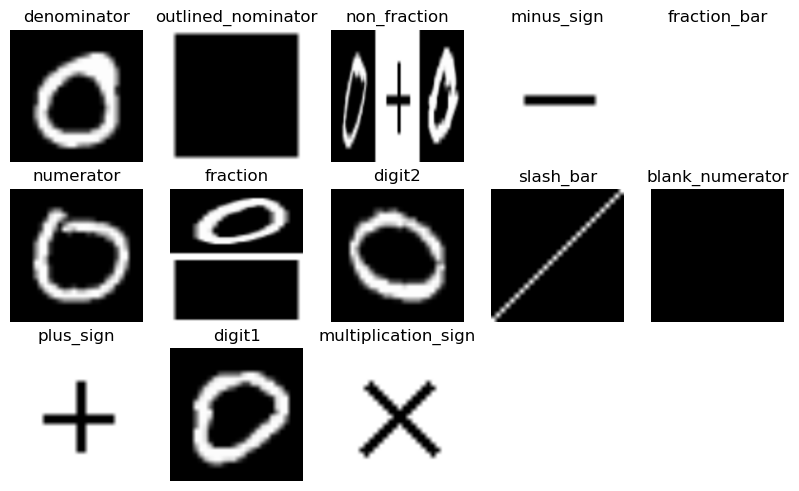

In [4]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(10, 10))
j = 0
for i in list(set(y)):
    idx = y.index(i)
    img = x[idx]
    img = cv2.resize(img, (256, 256))
    figure.add_subplot(5, 5, j+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    j += 1

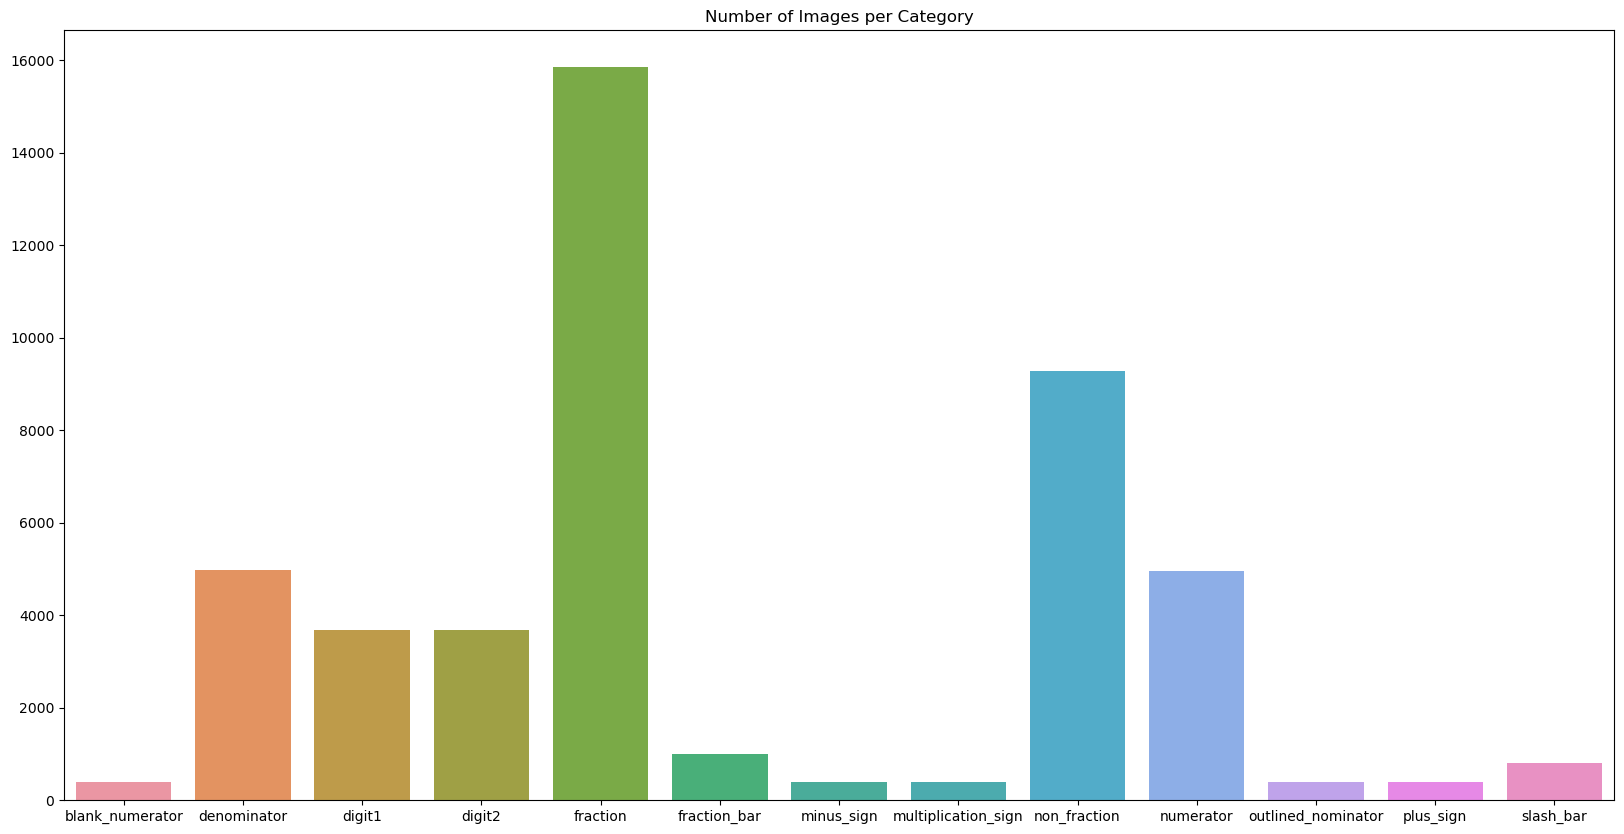

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
unique, count = np.unique(y, return_counts=True)
figure = plt.figure(figsize=(20, 10))
sns.barplot(x=unique, y=count).set_title('Number of Images per Category')
plt.show()

In [6]:
X = []
for i in range(len(x)):
#     print(i)
    img = x[i]
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    threshold_image = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)[1]
    threshold_image = cv2.resize(threshold_image, (32, 32))
    X.append(threshold_image)
print(len(X))

46205


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(len(y))

46205


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

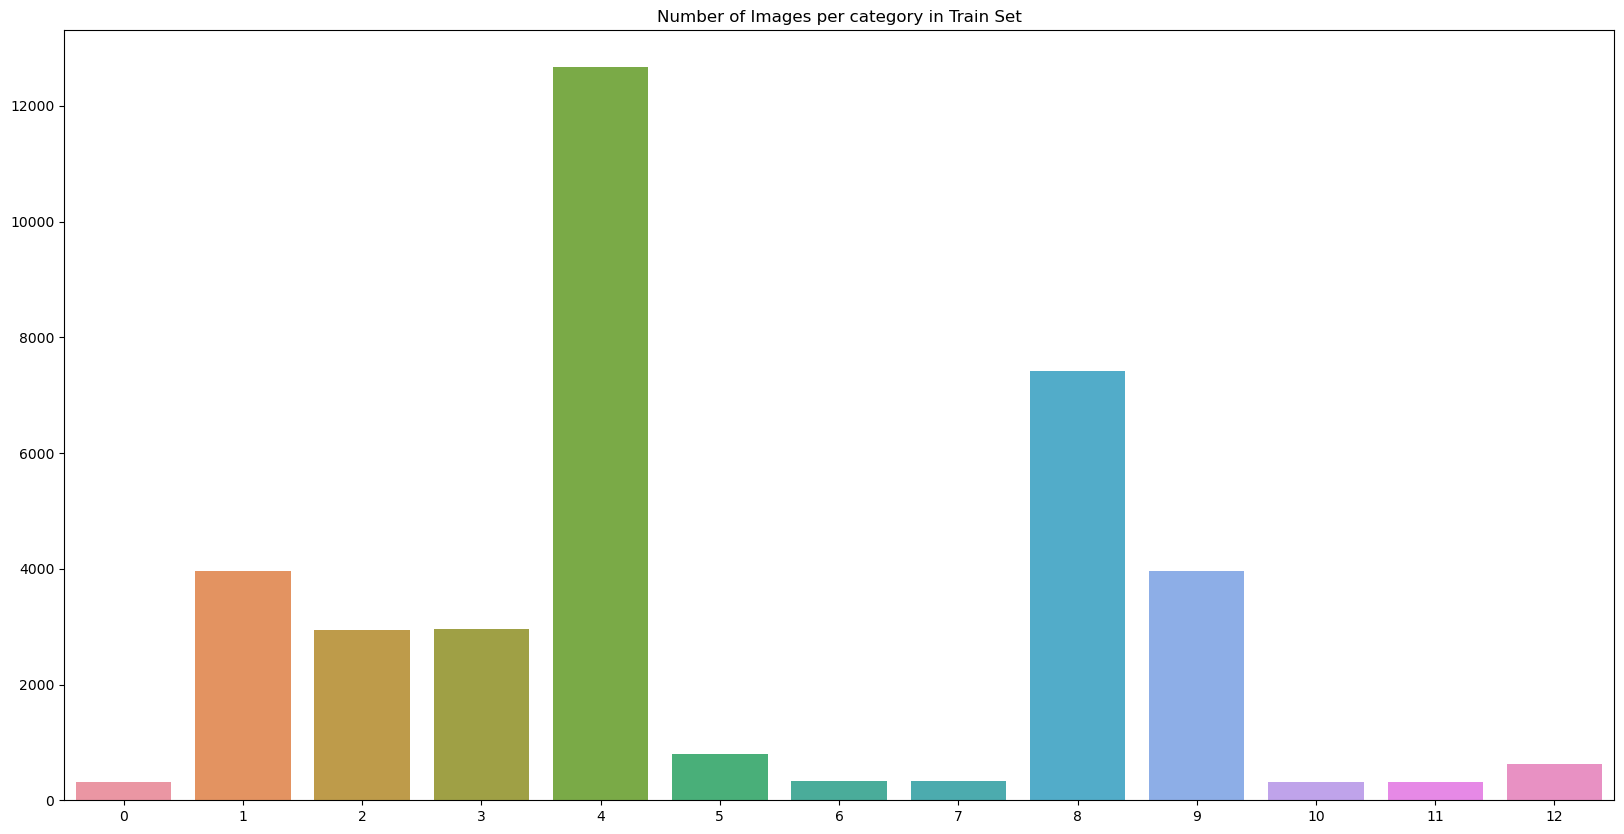

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
unique_train, count_train = np.unique(Y_train, return_counts=True)
figure = plt.figure(figsize=(20, 10))
sns.barplot(x=unique_train, y=count_train).set_title('Number of Images per category in Train Set')
plt.show()

In [11]:
!pip install tensorflow
import tensorflow as tf

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

In [13]:
!pip install tensorflow
import tensorflow as tf
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_train = X_train/255.
X_test = X_test/255.

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(36964, 32, 32, 1)
(9241, 32, 32, 1)
(36964, 13)
(9241, 13)


In [18]:
def math_symbol_and_digits_recognition(input_shape=(32, 32, 1)):
    regularizer = l2(0.01)
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv1', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act1'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv2', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act2'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv3', activity_regularizer=regularizer))
    model.add(Activation(activation='relu', name='act3'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(120, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc1'))
    model.add(Dense(84, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc2'))
    model.add(Dense(13, activation='softmax', kernel_initializer=glorot_uniform(seed=0), name='fc3'))
    
    optimizer = Adam()
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [19]:
model = math_symbol_and_digits_recognition(input_shape=(32, 32, 1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 32)        320       
                                                                 
 act1 (Activation)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 32)        9248      
                                                                 
 act2 (Activation)           (None, 16, 16, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                  

In [20]:
def step_decay(epoch):
    initial_learning_rate = 0.001
    dropEvery = 10
    factor = 0.5
    lr = initial_learning_rate*(factor**np.floor((1 + epoch)/dropEvery))
    return float(lr)

checkpoint = ModelCheckpoint('maths_symbol_and_digits_recognition.h5', 
                             monitor='val_loss', save_best_only=True, 
                             verbose=1, mode='min')

callbacks = [checkpoint, LearningRateScheduler(step_decay)]

In [21]:
aug = ImageDataGenerator(zoom_range=0.1,
#                          rotation_range=5,
                         width_shift_range=0.05,
                         height_shift_range=0.05)
hist = model.fit(aug.flow(X_train, Y_train, batch_size=128), batch_size=128, epochs=80, validation_data=(X_test, Y_test))
#hist2 = model.fit(X_train, Y_train, batch_size=128, epochs=100, validation_data=(X_test, Y_test), callbacks=callbacks)

Epoch 1/80
289/289 [==============================] - 23s 74ms/step - loss: 1.8200 - accuracy: 0.6335 - val_loss: 0.9438 - val_accuracy: 0.6857
Epoch 2/80
289/289 [==============================] - 24s 84ms/step - loss: 0.6938 - accuracy: 0.7185 - val_loss: 0.6905 - val_accuracy: 0.7131
Epoch 3/80
289/289 [==============================] - 24s 84ms/step - loss: 0.9866 - accuracy: 0.6821 - val_loss: 0.6783 - val_accuracy: 0.7219
Epoch 4/80
289/289 [==============================] - 29s 99ms/step - loss: 0.5998 - accuracy: 0.7212 - val_loss: 0.6250 - val_accuracy: 0.7036
Epoch 5/80
289/289 [==============================] - 27s 93ms/step - loss: 0.5777 - accuracy: 0.7212 - val_loss: 0.6015 - val_accuracy: 0.7117
Epoch 6/80
289/289 [==============================] - 23s 80ms/step - loss: 0.5669 - accuracy: 0.7240 - val_loss: 0.5897 - val_accuracy: 0.7116
Epoch 7/80
289/289 [==============================] - 26s 90ms/step - loss: 0.5592 - accuracy: 0.7237 - val_loss: 0.5770 - val_accuracy:

289/289 [==============================] - 30s 103ms/step - loss: 0.5472 - accuracy: 0.7245 - val_loss: 0.5353 - val_accuracy: 0.7228
Epoch 58/80
289/289 [==============================] - 27s 93ms/step - loss: 0.5524 - accuracy: 0.7246 - val_loss: 0.5407 - val_accuracy: 0.7252
Epoch 59/80
289/289 [==============================] - 27s 92ms/step - loss: 0.5441 - accuracy: 0.7248 - val_loss: 0.5572 - val_accuracy: 0.7233
Epoch 60/80
289/289 [==============================] - 26s 89ms/step - loss: 0.5406 - accuracy: 0.7272 - val_loss: 0.5772 - val_accuracy: 0.7241
Epoch 61/80
289/289 [==============================] - 26s 89ms/step - loss: 0.5373 - accuracy: 0.7259 - val_loss: 0.5533 - val_accuracy: 0.7260
Epoch 62/80
289/289 [==============================] - 29s 101ms/step - loss: 0.5324 - accuracy: 0.7278 - val_loss: 0.5276 - val_accuracy: 0.7282
Epoch 63/80
289/289 [==============================] - 26s 89ms/step - loss: 0.5404 - accuracy: 0.7274 - val_loss: 0.6331 - val_accuracy: 0.

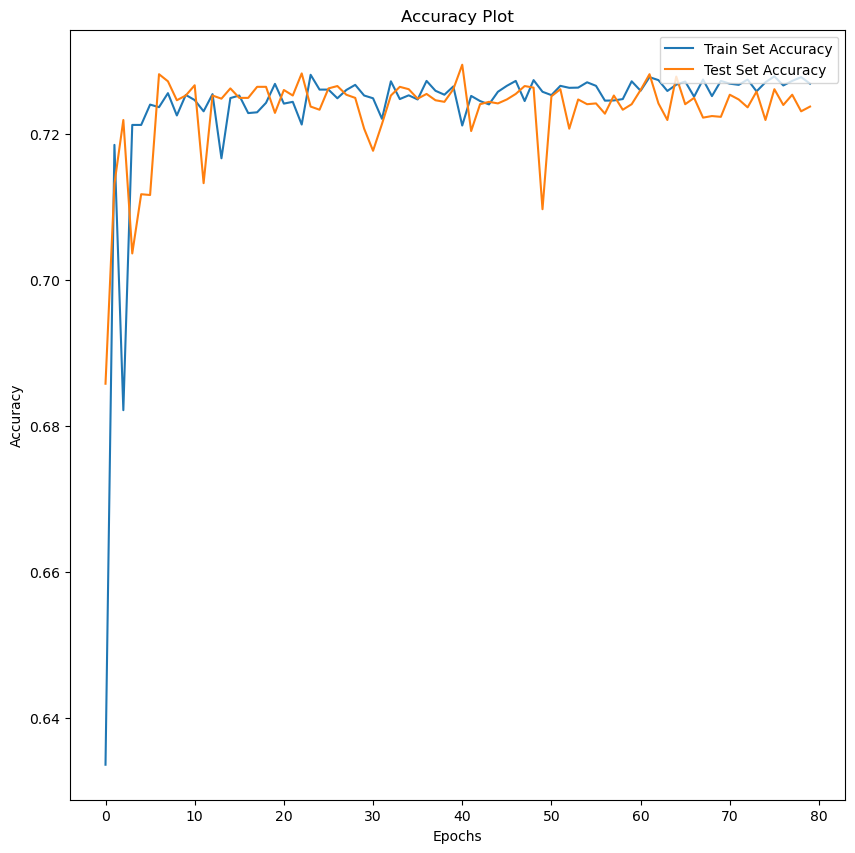

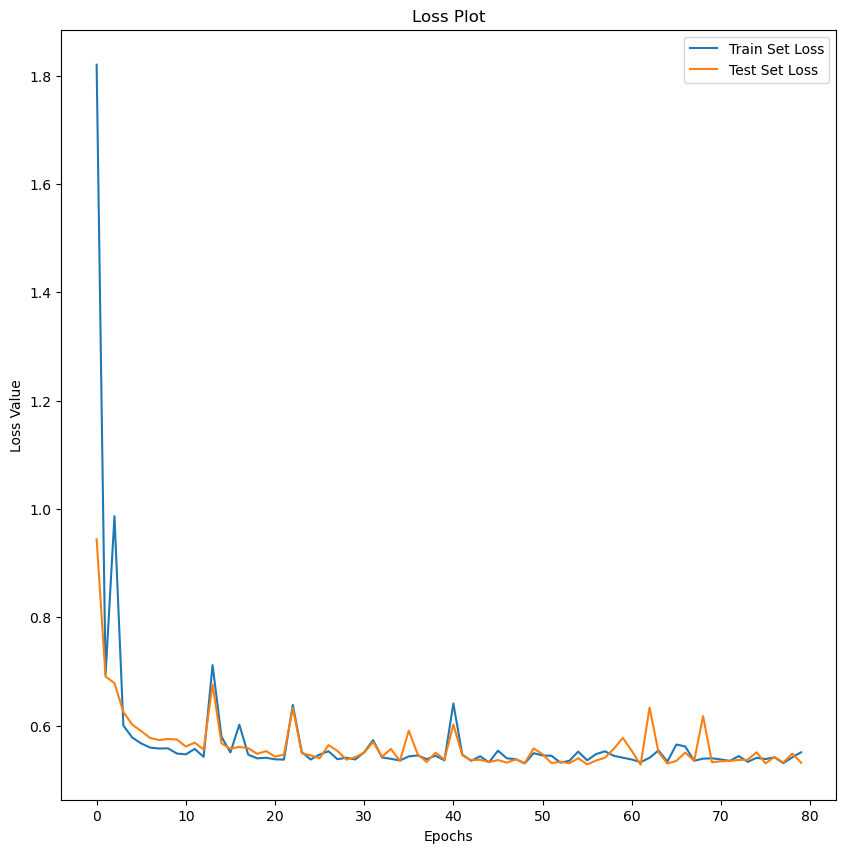

In [22]:
figure = plt.figure(figsize=(10, 10))
plt.plot(hist.history['accuracy'], label='Train Set Accuracy')
plt.plot(hist.history['val_accuracy'], label='Test Set Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(hist.history['loss'], label='Train Set Loss')
plt.plot(hist.history['val_loss'], label='Test Set Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(loc='upper right')
plt.show()

In [23]:
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
Y_test_hat = np.argmax(Y_test, axis=1)
print(classification_report(Y_test_hat, ypred))

289/289 [==============================] - 2s 4ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       0.26      0.13      0.17       997
           2       0.31      0.03      0.05       741
           3       0.23      0.06      0.09       711
           4       1.00      1.00      1.00      3180
           5       1.00      1.00      1.00       199
           6       1.00      1.00      1.00        73
           7       1.00      1.00      1.00        69
           8       1.00      1.00      1.00      1859
           9       0.28      0.71      0.40       996
          10       0.31      1.00      0.48        78
          11       1.00      1.00      1.00        83
          12       0.99      1.00      1.00       176

    accuracy                           0.72      9241
   macro avg       0.72      0.76      0.71      9241
weighted avg       0.72      0.72      0.70      9241



In [56]:
def test_pipeline(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (800, 800))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # blurred = cv2.GaussianBlur(img_gray, (3, 3), 0)
    edged = cv2.Canny(img_gray, 30, 150)
    contours = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    contours = sort_contours(contours, method="left-to-right")[0]
    #labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'fraction','result']
    labels = ['denominator', 'outlined_nominator', 'non_fraction', 'minus_sign', 'fraction_bar', 'numerator', 'fraction', 'digit2', 'slash_bar', 'blank_numerator', 'plus_sign', 'digit1', 'multiplication_sign']
    for c in contours:
        (x, y, w, h) = cv2.boundingRect(c)
        if 20<=w and 30<=h:
            roi = img_gray[y:y+h, x:x+w]
            thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            (th, tw) = thresh.shape
            if tw > th:
                thresh = imutils.resize(thresh, width=32)
            if th > tw:
                thresh = imutils.resize(thresh, height=32)
            (th, tw) = thresh.shape
            dx = int(max(0, 32 - tw)/2.0)
            dy = int(max(0, 32 - th) / 2.0)
            padded = cv2.copyMakeBorder(thresh, top=dy, bottom=dy, left=dx, right=dx, borderType=cv2.BORDER_CONSTANT,
                                       value=(0, 0, 0))
            padded = cv2.resize(padded, (32, 32))
            padded = np.array(padded)
            padded = padded/255.
            padded = np.expand_dims(padded, axis=0)
            padded = np.expand_dims(padded, axis=-1)
            pred = model.predict(padded)
            pred = np.argmax(pred, axis=1)
            label = labels[pred[0]]
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(img, label, (x-5, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))

    figure = plt.figure(figsize=(10, 10))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [62]:
#Second Version
def test_pipeline(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (800, 800))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # blurred = cv2.GaussianBlur(img_gray, (3, 3), 0)
    edged = cv2.Canny(img_gray, 30, 150)
    contours = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    contours = sort_contours(contours, method="left-to-right")[0]
    labels = ['denominator', 'outlined_nominator', 'non_fraction', 'minus_sign', 'fraction_bar', 'numerator', 'fraction', 'digit2', 'slash_bar', 'blank_numerator', 'plus_sign', 'digit1', 'multiplication_sign']
    detected_labels = []

    for c in contours:
        (x, y, w, h) = cv2.boundingRect(c)
        if 20 <= w and 30 <= h:
            roi = img_gray[y:y+h, x:x+w]
            thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            (th, tw) = thresh.shape
            if tw > th:
                thresh = imutils.resize(thresh, width=32)
            if th > tw:
                thresh = imutils.resize(thresh, height=32)
            (th, tw) = thresh.shape
            dx = int(max(0, 32 - tw) / 2.0)
            dy = int(max(0, 32 - th) / 2.0)
            padded = cv2.copyMakeBorder(thresh, top=dy, bottom=dy, left=dx, right=dx,
                                        borderType=cv2.BORDER_CONSTANT,
                                        value=(0, 0, 0))
            padded = cv2.resize(padded, (32, 32))
            padded = np.array(padded)
            padded = padded / 255.
            padded = np.expand_dims(padded, axis=0)
            padded = np.expand_dims(padded, axis=-1)
            pred = model.predict(padded)
            pred = np.argmax(pred, axis=1)
            label = labels[pred[0]]
            detected_labels.append(label)
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(img, label, (x-5, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))

    figure = plt.figure(figsize=(10, 10))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    return detected_labels

1/1 [==============================] - 0s 28ms/step


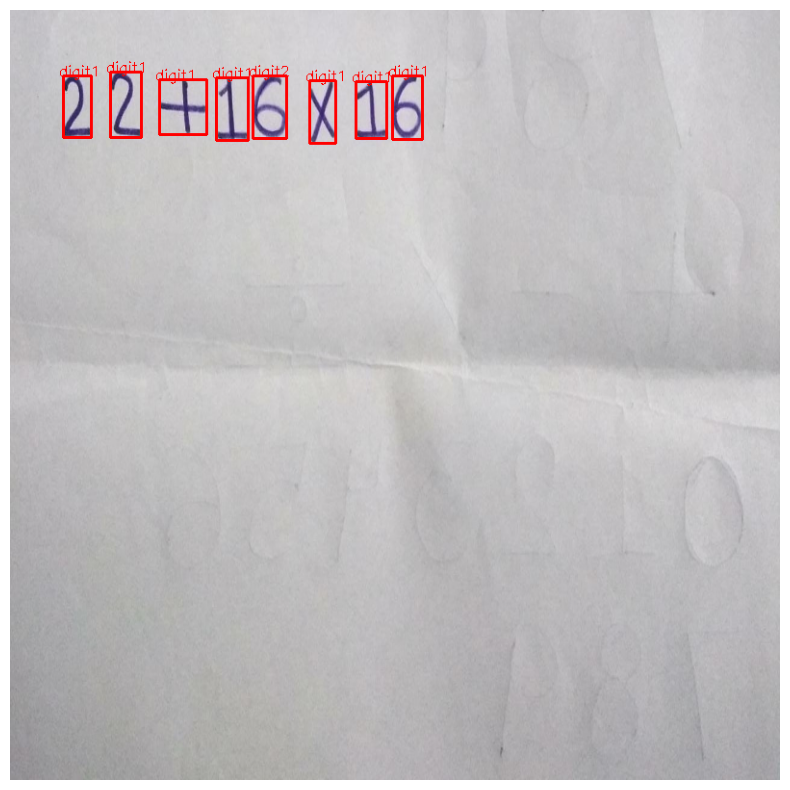

mytest.jpg


In [63]:
test_pipeline('mytest.jpg')
print('mytest.jpg')

1/1 [==============================] - 0s 30ms/step


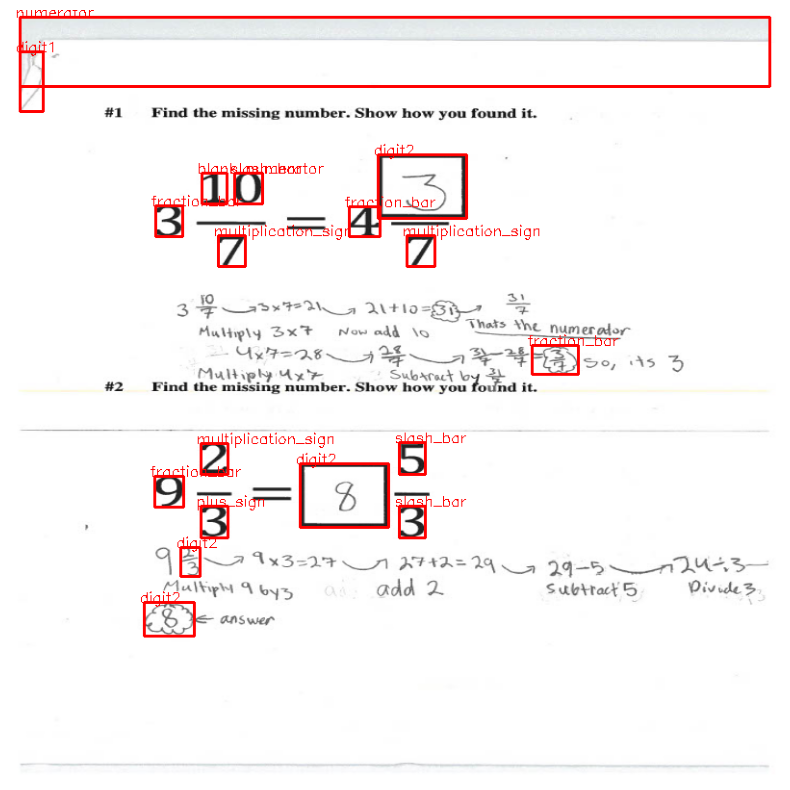

Number of fraction objects: 0


In [64]:
detected_labels = test_pipeline('5.jpg')
fraction_count = detected_labels.count('fraction')
print('Number of fraction objects:', fraction_count)

1/1 [==============================] - 0s 30ms/step


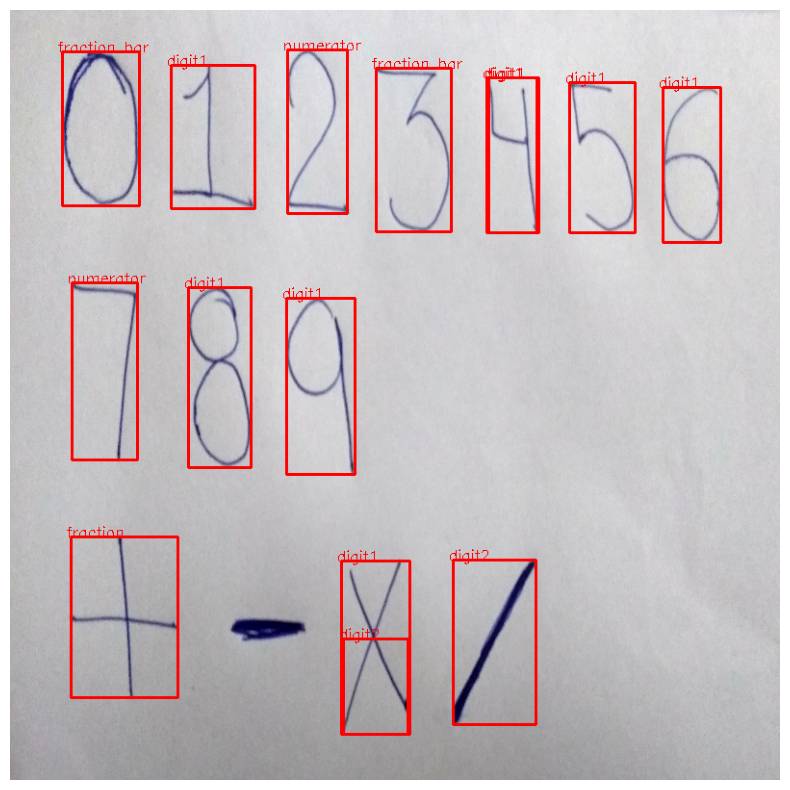

Number of fraction objects: 1


In [65]:
detected_labels = test_pipeline('test.jpg')
fraction_count = detected_labels.count('fraction')
print('Number of fraction objects:', fraction_count)